## NLP Using Machine Learning
This notebook demonstrates core Natural Language Processing techniques combined with
Machine Learning models, including tokenization, feature extraction, and model training —
# 🛠 Tools & Libraries
Python 🐍
NLTK / Scikit-learn
Pandas / NumPy
Jupyter Notebook
# Text Preprocessing
## Tokenization
Tokenization is the process of breaking down text into smaller pieces, called tokens, which
can be words, characters, or subwords.
# ✅ Why is Tokenization Important?
Computers don't understand raw human language directly. Tokenization converts
unstructured text into a structured format that algorithms can process.
# 💡 Types of Tokenization
1. Word Tokenization – Splits text into individual words.
2. Character Tokenization – Splits text into individual characters.
3. Subword Tokenization – Splits words into smaller meaningful parts (used in modern
models like BERT or GPT).
all with hands-on Python code.
Read what we type
Understand what we mean
Talk back like a human
NLP (Natural Languag

## 🧠 Example
Original Text: ChatGPT is amazing!
### 1. Word Tokenization:
["ChatGPT", "is", "amazing", "!"]

Each word and punctuation is treated as a separate token.
### 2. Character Tokenization:
["C", "h", "a", "t", "G", "P", "T", " ", "i", "s", " ", "a", "m", "a",
"z", "i", "n", "g", "!"]

Every character is a token, including spaces and punctuation.
### 3. Subword Tokenization (e.g., using BPE or WordPiece):
["Chat", "G", "PT", " is", " amazing", "!"]

Words are split into smaller chunks, especially useful for rare or compound words

In [1]:
from rich.console import Console

console = Console()

In [2]:
from nltk.tokenize import sent_tokenize
text = "ChatGPT is amazing! It can help you write code, explain concepts, and much"
sentences = sent_tokenize(text)
console.print(sentences)


['ChatGPT is amazing!', 'It can help you write code, explain concepts, and much']

In [3]:
from nltk.tokenize import word_tokenize
text = "ChatGPT is amazing!"
tokens = word_tokenize(text)
console.print(tokens)


['ChatGPT', 'is', 'amazing', '!']

# Stemming
Reduces words to their root form by chopping off suffixes.
## 1. Porter Stemmer
### ✅ Use Case:
In [1]: In [2]:
Best for general English text processing tasks like information retrieval, search engines,
or basic NLP pipelines.
Good balance between performance and accuracy.
### 📌 Characteristics:
Rule-based and relatively conservative.
May not always produce real words.

In [4]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ["running", "flies", "easily", "flying", "played", "happily"]
stems = [stemmer.stem(word) for word in words]
console.print(stems)


['run', 'fli', 'easili', 'fli', 'play', 'happili']

## 2. Lancaster Stemmer
✅ Use Case:
Suitable when you value speed and want a very aggressive stemming strategy.
Good for use cases where over-stemming is acceptable, such as duplicate detection or
topic clustering.
### 📌 Characteristics:
More aggressive than Porter.
Often reduces words too much (over-stemming), which may distort meaning.


In [5]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
words = ["running", "flies", "easily", "flying", "played", "happily"]
[stemmer.stem(w) for w in words]

['run', 'fli', 'easy', 'fly', 'play', 'happy']

## 3. Snowball Stemmer (Porter2)
✅ Use Case:
A better choice for modern NLP tasks, offering a good balance between accuracy and
aggressiveness. In [3]: In [4]: Out[4]:
Recommended for multi-language support, text normalization, and machine learning
pipelines.
### 📌 Characteristics:
More advanced and consistent than Porter.
Supports multiple languages ("english", "french", "german", etc.).

In [6]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
words = ["running", "flies", "easily", "flying", "played", "happily"]
[stemmer.stem(w) for w in words]


['run', 'fli', 'easili', 'fli', 'play', 'happili']

## 4. RegexpStemmer
✅ Use Case:
Custom stemming based on your own rules using regular expressions.
Best for domain-specific tasks where default stemmers don’t work well.
Useful when you want to strip predictable suffixes like “-ing”, “-ed”, “-s”, etc.
### 📌 Characteristics:
Allows manual control over stemming behavior.
Not intelligent—only removes matching patterns based on your rule.


In [7]:
from nltk.stem import RegexpStemmer
# Remove common suffixes manually
stemmer = RegexpStemmer('ing$|ed$|s$')
words = ["running", "flies", "played", "talks", "jumps"]
stems = [stemmer.stem(w) for w in words]
console.print(stems)


['runn', 'flie', 'play', 'talk', 'jump']

In [8]:
stemmer = RegexpStemmer('ing$')
words = ["running", "playing", "reading"]
stems = [stemmer.stem(w) for w in words]
console.print(stems)

['runn', 'play', 'read']

### Lemmatization
Feature  ------ Stemming ----- Lemmatization

Output----Root form (can be non-word)-------- Dictionary word

Context aware? ----- ❌ No ------ ✅ Yes

Example---- running → run (both) -------better → good (only in lemmatization)

POS used?---- ❌ Usually not ------✅ Required for accuracy

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ["running", "flies", "easily", "flying", "played", "happily"]
lemmas = [lemmatizer.lemmatize(word) for word in words]
console.print(lemmas)

['running', 'fly', 'easily', 'flying', 'played', 'happily']

In [10]:
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
console.print(lemmas)

['run', 'fly', 'easily', 'fly', 'play', 'happily']

In [11]:
words = [
 ("running", "v"), # verb
 ("flies", "n"), # noun
 ("better", "a"), # adjective
 ("played", "v"),
 ("children", "n"), # plural noun
 ("am", "v"), # verb (be form)
]
for word, pos in words:
 console.print(f"{word} ({pos}) → {lemmatizer.lemmatize(word, pos)}")

running (v) → run

flies (n) → fly

better (a) → good

played (v) → play

children (n) → child

am (v) → be

### Parts of Speech tagging
POS tagging is the process of assigning a grammatical category (noun, verb, adjective, etc.)
to each word in a sentence.

#### 📌 Example Categories:
NN – Noun (e.g., dog, book)
VB – Verb (base form, e.g., run, play) In [8]: In [9]: In [10]:
JJ – Adjective (e.g., happy, blue)
RB – Adverb (e.g., quickly, very)
PRP – Personal pronoun (e.g., he, they)
IN – Preposition (e.g., in, on)

## Use Case Benefit of POS Tagging
Lemmatization  == Uses POS to return correct base form
Named Entity Recognition == Helps identify proper nouns and entities
Syntactic Parsing == Enables grammar-based sentence analysis
Text classification == Feature for ML models (e.g., noun frequency)
Question answering == Understands subject-verb-object relationships


In [12]:
import nltk
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
paragraph = """
Natural Language Processing is a fascinating field of study in computer science.
It deals with the interaction between computers and human language.
Researchers are developing algorithms that can understand, interpret, and generate
Applications include chatbots, translation tools, sentiment analysis, and more.
"""


In [14]:
tokens = word_tokenize(paragraph)
tagged = pos_tag(tokens)
tagged[:10]


[('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fascinating', 'JJ'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('study', 'NN'),
 ('in', 'IN')]

In [15]:
import pandas as pd
df = pd.DataFrame(tagged, columns=["Token", "POS Tag"])
console.print(df.head(15))


Token POS Tag
0       Natural      JJ
1      Language     NNP
2    Processing     NNP
3            is     VBZ
4             a      DT
5   fascinating      JJ
6         field      NN
7            of      IN
8         study      NN
9            in      IN
10     computer      NN
11      science      NN
12            .       .
13           It     PRP
14        deals     VBZ

📌 Named Entity Recognition (NER)
Named Entity Recognition (NER) is the process of identifying and classifying named entities in text into predefined categories.

✅ Common NER Categories and Examples:


| **Category**   | **Examples**                                                  |
| -------------- | ------------------------------------------------------------- |
| `PERSON`       | Elon Musk, Barack Obama                                       |
| `ORGANIZATION` | Google, United Nations                                        |
| `LOCATION`     | Paris, Mount Everest                                          |
| `DATE`         | July 4, 2025, Monday                                          |
| `TIME`         | 5 p.m., noon                                                  |
| `MONEY`        | \$100, 1 million euros                                        |
| `PERCENT`      | 90%, 25 percent                                               |
| `GPE`          | Countries, cities, states (e.g., India, New York, California) |


In [16]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
text = """
Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in Cupertino,
In 2023, the company reported revenues of over $394 billion.
President Joe Biden visited the Apple headquarters last summer.
"""

In [18]:
!pip install svgling

In [19]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [20]:
words = word_tokenize(text)
tag_elements = pos_tag(words)
named_entities = ne_chunk(tag_elements)

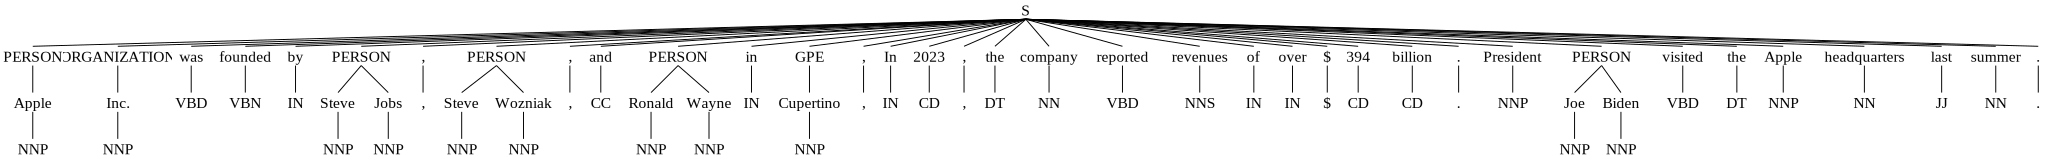

In [23]:
named_entities


In [24]:
console.print(named_entities)

Tree('S', [Tree('PERSON', [('Apple', 'NNP')]), Tree('ORGANIZATION', [('Inc.', 'NNP')]), ('was', 'VBD'), ('founded',
'VBN'), ('by', 'IN'), Tree('PERSON', [('Steve', 'NNP'), ('Jobs', 'NNP')]), (',', ','), Tree('PERSON', [('Steve', 
'NNP'), ('Wozniak', 'NNP')]), (',', ','), ('and', 'CC'), Tree('PERSON', [('Ronald', 'NNP'), ('Wayne', 'NNP')]), 
('in', 'IN'), Tree('GPE', [('Cupertino', 'NNP')]), (',', ','), ('In', 'IN'), ('2023', 'CD'), (',', ','), ('the', 
'DT'), ('company', 'NN'), ('reported', 'VBD'), ('revenues', 'NNS'), ('of', 'IN'), ('over', 'IN'), ('$', '$'), 
('394', 'CD'), ('billion', 'CD'), ('.', '.'), ('President', 'NNP'), Tree('PERSON', [('Joe', 'NNP'), ('Biden', 
'NNP')]), ('visited', 'VBD'), ('the', 'DT'), ('Apple', 'NNP'), ('headquarters', 'NN'), ('last', 'JJ'), ('summer', 
'NN'), ('.', '.')])

## 🔢 Text to Vectors
🧠 Why Convert Words to Vectors?
Machine learning models can only understand numbers, not raw text.
To train models for tasks like text classification, machine translation, sentiment analysis, and more, we need to convert words or documents into numerical vectors.

## 1️ One-Hot Encoding
🧠 What is One-Hot Encoding?
One-Hot Encoding represents each word in a vocabulary as a binary vector:

Each word is represented by a vector of the same length as the vocabulary.

The position corresponding to the word is 1, and all other positions are 0.

### 🔍 Example:
Suppose we have the following vocabulary of 5 words:

["I", "love", "NLP", "is", "fun"]

Then the one-hot encodings would be:

| **Word** | **One-Hot Vector** |
| -------- | ------------------ |
| I        | \[1, 0, 0, 0, 0]   |
| love     | \[0, 1, 0, 0, 0]   |
| NLP      | \[0, 0, 1, 0, 0]   |
| is       | \[0, 0, 0, 1, 0]   |
| fun      | \[0, 0, 0, 0, 1]   |


In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
words = np.array(["I", "love", "NLP", "is", "fun"]).reshape(-1, 1)
encoder = OneHotEncoder()
onehot = encoder.fit_transform(words)
console.print(encoder.categories_)

[array(['I', 'NLP', 'fun', 'is', 'love'], dtype='<U4')]

In [27]:
console.print(onehot)

(0, 0)        1.0
  (1, 4)        1.0
  (2, 1)        1.0
  (3, 3)        1.0
  (4, 2)        1.0

## Limitations of One-Hot Encoding

| **Limitation**          | **Description**                                                 |
| ----------------------- | --------------------------------------------------------------- |
| **High dimensionality** | If you have 10,000 words → vectors are of length 10,000         |
| **No semantics**        | All vectors are equally distant → does not capture word meaning |
| **Memory inefficient**  | Vectors are mostly zeros (sparse) → inefficient memory usage    |

## When to Use One-Hot Encoding

| **Use Case**                    | **Suitability**                                          |
| ------------------------------- | -------------------------------------------------------- |
| **Simple rule-based systems**   | ✅ Good fit for straightforward classification            |
| **Small, fixed vocabularies**   | ✅ Efficient and easy to manage                           |
| **As part of embedding layers** | ✅ Often used before training models like Word2Vec, BERT  |
| **Large NLP models**            | ❌ Not scalable due to dimensionality and sparsity issues |


🔍 While One-Hot Encoding is useful in small-scale tasks, more advanced NLP tasks benefit from dense word embeddings like Word2Vec, GloVe, or transformer-based emb

## 2. Bag of Words (BoW)
📌 Description:
Counts how many times each word appears in a document.
Ignores grammar and word order.
✅ Use Case:
Simple text classification tasks (e.g., spam detection, topic classification).

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ["I love NLP", "NLP is fun and useful"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
console.print(vectorizer.get_feature_names_out())


['and' 'fun' 'is' 'love' 'nlp' 'useful']

In [30]:
console.print(X.toarray())


[[0 0 0 1 1 0]
 [1 1 1 0 1 1]]

## What is an N-gram?
An N-gram is a contiguous sequence of n items (usually words) from a given text or speech.

| **N** | **Type** | **Description**                       |
| ----- | -------- | ------------------------------------- |
| 1     | Unigram  | A single word                         |
| 2     | Bigram   | A pair of consecutive words           |
| 3     | Trigram  | A sequence of three consecutive words |
| n     | N-gram   | A sequence of *n* consecutive words   |

N-grams help preserve context and word order compared to Bag of Words (BoW), which treats words independently.

.

## Example:
Text: "I love natural language processing"
| **N** | **N-grams**                                                              |
| ----- | ------------------------------------------------------------------------ |
| 1     | `I`, `love`, `natural`, `language`, `processing`                         |
| 2     | `I love`, `love natural`, `natural language`, `language processing`      |
| 3     | `I love natural`, `love natural language`, `natural language processing` |
##   Use Cases:

Language modeling

Text classification

Autocomplete

Spell correction


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love natural language processing"]
vectorizer = CountVectorizer(ngram_range=(1, 2)) # unigrams and bigrams
X = vectorizer.fit_transform(text)
console.print("N-gram Vocabulary:", vectorizer.get_feature_names_out())
console.print("N-gram Matrix:\n", X.toarray())

N-gram Vocabulary: ['language' 'language processing' 'love' 'love natural' 'natural'
 'natural language' 'processing']

N-gram Matrix:
 [[1 1 1 1 1 1 1]]

| **Use Case**            | **Benefit**                                               |
| ----------------------- | --------------------------------------------------------- |
| **Language modeling**   | Predict the next word based on the previous *n* words     |
| **Text classification** | Capture meaningful phrases (e.g., "not good", "very bad") |
| **Sentiment analysis**  | Understand multi-word expressions and context             |
| **Spelling correction** | Match and compare against common n-gram sequences         |


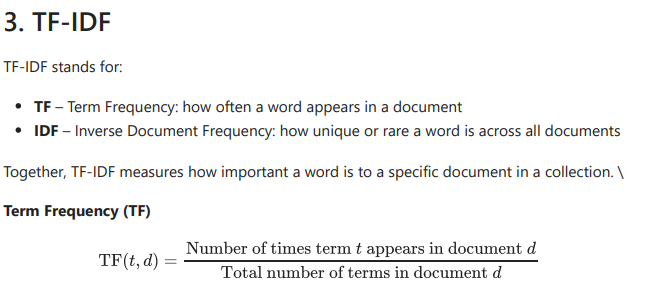

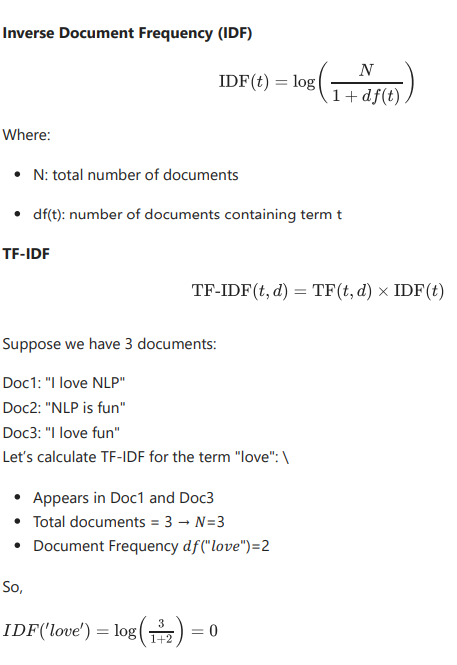

Meaning: "love" is too common → has low importance.


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
docs = ["I love NLP", "NLP is fun", "I love fun"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
console.print(vectorizer.get_feature_names_out())
console.print(X.toarray())


['fun' 'is' 'love' 'nlp']

[[0.         0.         0.70710678 0.70710678]
 [0.51785612 0.68091856 0.         0.51785612]
 [0.70710678 0.         0.70710678 0.        ]]

## Why Use TF-IDF?
TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.
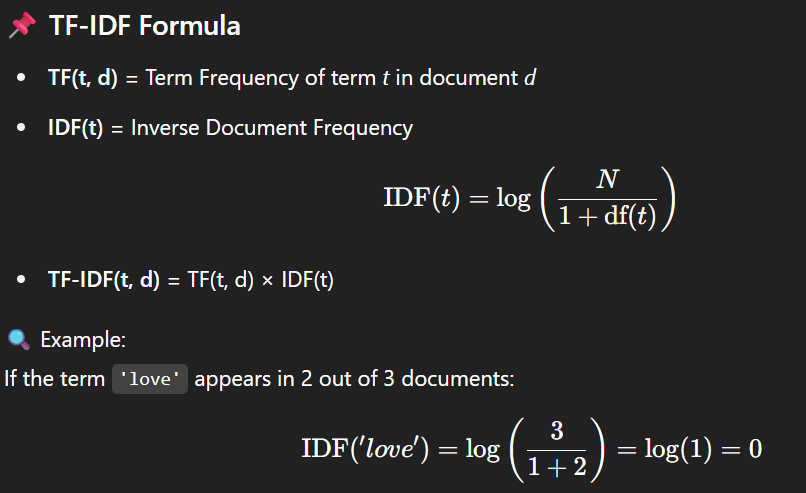
### TF-IDF Benefits

| **Feature**                  | **Benefit**                                                     |
| ---------------------------- | --------------------------------------------------------------- |
| Weights important words      | Down-weights common but uninformative words (e.g., “the”, “is”) |
| Improves text classification | Better than raw counts like Bag of Words                        |
| Useful for document ranking  | Used in search engines like Google                              |
### TF-IDF Limitations
| **Limitation**       | **Description**                            |
| -------------------- | ------------------------------------------ |
| No semantic meaning  | “love” and “like” are treated as unrelated |
| Still sparse vectors | Inefficient for large vocabularies         |
| Ignores word order   | Cannot detect phrases or grammar           |
### Summary

| **Term**   | **Meaning**                                 |
| ---------- | ------------------------------------------- |
| **TF**     | How often a word occurs in a document       |
| **IDF**    | How rare the word is across all documents   |
| **TF-IDF** | Importance of a word in a specific document |


 # Word Embeddings
Word embeddings are dense vector representations of words where similar words are mapped to similar vectors.
## Intuition:
vector("king") - vector("man") + vector("woman") ≈ vector("queen")
## Example Vectors
| **Word** | **Vector (Sample)** |
| -------- | ------------------- |
| king     | \[0.2, 0.5, -0.3]   |
| queen    | \[0.2, 0.6, -0.3]   |
| apple    | \[-0.7, 0.1, 0.4]   |

* "king" and "queen" → similar vectors

* "apple" → very different → not semantically related

## Why Use Word Embeddings?
| **Problem with Traditional**      | **How Embeddings Help**                     |
| --------------------------------- | ------------------------------------------- |
| One-hot vectors are huge & sparse | Dense & compact vectors                     |
| No meaning or similarity captured | Embeddings group similar meanings           |
| Cannot generalize context         | Embeddings capture word usage and semantics |

## Key Idea
Each word is represented as a real-valued vector (e.g., 100–300 dimensions), trained so that:

Words used in similar contexts have similar embeddings.

## Common Word Embedding Models
| **Model**  | **Description**                                             |
| ---------- | ----------------------------------------------------------- |
| Word2Vec   | Predicts a word from context or vice versa                  |
| GloVe      | Matrix factorization of word co-occurrence                  |
| FastText   | Includes subword info → handles misspellings & rare words   |
| ELMo, BERT | Contextual embeddings → meaning depends on sentence context |


# What is Word2Vec?
Word2Vec (Google, 2013) turns words into vectors using a shallow neural network.

## How It Works
Word2Vec has two training methods:

## 1 CBOW (Continuous Bag of Words)
Predicts the target word using context words.

Input: Context words

Output: Target word

## Example:

Sentence: "The cat sits on the mat"
Window size = 2
Context: ["The", "sits"] → Target: "cat"

## 2 Skip-Gram
Predicts context words from the target word.

Input: Target word

Output: Context words

Example:

Target: "cat" → Context: ["The", "sits"]
##  CBOW vs Skip-Gram
Feature	CBOW	Skip-Gram
Direction	Context → Target	Target → Context
Performance	Faster to train	Slower to train
Accuracy (Rare Words)	Lower	Better for rare words

CBOW is faster and works better for frequent words.

Skip-Gram is better for rare words and learns finer representations.



In [35]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')
# Sample corpus
text = "The cat sits on the mat. The dog plays with the cat."
# Tokenize
tokens = word_tokenize(text.lower())
print("Tokens:", tokens)
# Create a list of sentences for Word2Vec (list of list of tokens)

data = [tokens]
# CBOW Model (sg=0)
cbow_model = Word2Vec(sentences=data, vector_size=50, window=2, min_count=1, sg=0)
# Skip-Gram Model (sg=1)
skipgram_model = Word2Vec(sentences=data, vector_size=50, window=2, min_count=1, sg=1)
# Check vector of a word
console.print("\nCBOW Vector for 'cat':\n", cbow_model.wv['cat'])
console.print("\nSkip-Gram Vector for 'cat':\n", skipgram_model.wv['cat'])
# Find similar words
console.print("\nCBOW similar to 'cat':", cbow_model.wv.most_similar('cat'))
console.print("Skip-Gram similar to 'cat':", skipgram_model.wv.most_similar('cat'))

Tokens: ['the', 'cat', 'sits', 'on', 'the', 'mat', '.', 'the', 'dog', 'plays', 'with', 'the', 'cat', '.']


CBOW Vector for 'cat':
 [-0.01723935  0.00733214  0.0103783   0.01148358  0.01493548 -0.01233377
  0.00221044  0.01209513 -0.00568189 -0.01234571 -0.00082144 -0.01673858
 -0.01119803  0.01420926  0.00670669  0.01445003  0.0136016   0.01506361
 -0.00758013 -0.00112471  0.00469524 -0.00903911  0.01677665 -0.01971816
  0.01353099  0.00582779 -0.00986385  0.00879751 -0.00348056  0.01342362
  0.01993087 -0.00872648 -0.00120027 -0.01139181  0.00769979  0.00557291
  0.01378207  0.0122029   0.0190773   0.01854664  0.01579493 -0.01397864
 -0.01831192 -0.00071005 -0.00619883  0.01578961  0.01187746 -0.00309191
  0.00302099  0.00357986]

Skip-Gram Vector for 'cat':
 [-0.01723935  0.00733214  0.0103783   0.01148358  0.01493548 -0.01233377
  0.00221044  0.01209513 -0.00568189 -0.01234571 -0.00082144 -0.01673858
 -0.01119803  0.01420926  0.00670669  0.01445003  0.0136016   0.01506361
 -0.00758013 -0.00112471  0.00469524 -0.00903911  0.01677665 -0.01971816
  0.01353099  0.00582779 -0.00986385  0.00879751 -0.00348056  0.01342362
  0.01993087 -0.00872648 -0.00120027 -0.01139181  0.00769979  0.00557291
  0.01378207  0.0122029   0.0190773   0.01854664  0.01579493 -0.01397864
 -0.01831192 -0.00071005 -0.00619883  0.01578961  0.01187746 -0.00309191
  0.00302099  0.00357986]

CBOW similar to 'cat':
[
    ('plays', 0.16573309898376465),
    ('sits', 0.13941361010074615),
    ('the', 0.12668676674365997),
    ('mat', 0.08872271329164505),
    ('.', 0.01108431164175272),
    ('dog', -0.027830617502331734),
    ('with', -0.15517376363277435),
    ('on', -0.21871203184127808)
]

Skip-Gram similar to 'cat':
[
    ('plays', 0.16573309898376465),
    ('sits', 0.13941361010074615),
    ('the', 0.12668676674365997),
    ('mat', 0.08872271329164505),
    ('.', 0.01108431164175272),
    ('dog', -0.027830617502331734),
    ('with', -0.15517376363277435),
    ('on', -0.21871203184127808)
]